In [22]:
df = pd.DataFrame(io.l1b_filenames('inbound', iterator=False), columns=['fname'])
df.size

570

In [23]:
import os
df['basename'] = df.fname.map(os.path.basename)

In [24]:
df.columns

Index(['fname', 'basename'], dtype='object')

In [29]:
# removing echelle for now
df = df[~df.basename.str.contains('-ech')]
# then focusing on FUV data
df = df[df.basename.str.contains('-fuv_')]
# remove data with mode3001
df = df[~df.basename.str.contains('-mode3001-')]

In [30]:
df.basename.size

141

In [31]:
fnames = df.basename.copy()
fnames.sort()

In [32]:
fnames

85     mvn_iuv_l1b_inbound-orbit00238-fuv_20141112T13...
321    mvn_iuv_l1b_inbound-orbit00244-fuv_20141113T17...
438    mvn_iuv_l1b_inbound-orbit00248-fuv_20141114T12...
241    mvn_iuv_l1b_inbound-orbit00262-fuv_20141117T04...
58     mvn_iuv_l1b_inbound-orbit00266-fuv_20141117T22...
462    mvn_iuv_l1b_inbound-orbit00272-fuv_20141119T02...
500    mvn_iuv_l1b_inbound-orbit00335-fuv_20141201T03...
452    mvn_iuv_l1b_inbound-orbit00338-fuv_20141201T17...
432    mvn_iuv_l1b_inbound-orbit00341-fuv_20141202T07...
80     mvn_iuv_l1b_inbound-orbit00346-fuv_20141203T06...
217    mvn_iuv_l1b_inbound-orbit00349-fuv_20141203T19...
69     mvn_iuv_l1b_inbound-orbit00351-fuv_20141204T05...
195    mvn_iuv_l1b_inbound-orbit00354-fuv_20141204T18...
33     mvn_iuv_l1b_inbound-orbit00356-fuv_20141205T04...
323    mvn_iuv_l1b_inbound-orbit00358-fuv_20141205T13...
395    mvn_iuv_l1b_inbound-orbit00361-fuv_20141206T03...
27     mvn_iuv_l1b_inbound-orbit00363-fuv_20141206T12...
189    mvn_iuv_l1b_inbound-orbi

In [33]:
def calc_4_to_3(width):
    return width, width*3/4
plt.style.use('bmh')
plt.rcParams['figure.figsize']= calc_4_to_3(9)
plt.rcParams['image.aspect'] = 'auto'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['lines.linewidth'] = 1
plt.ioff()

In [12]:
%matplotlib inline

In [34]:
l1b = io.L1BReader(fnames.iloc[0])

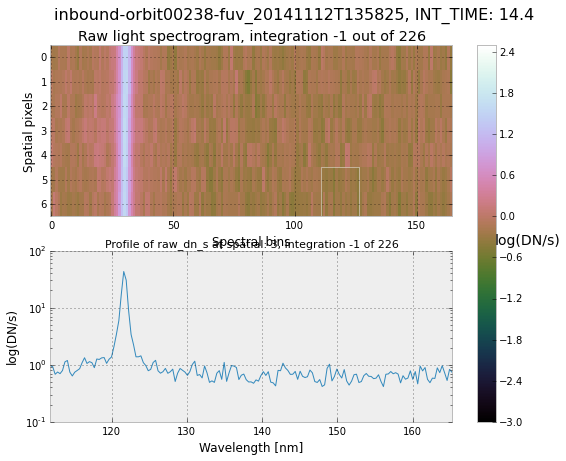

In [35]:
l1b.plot_raw_overview();

In [37]:
def process_fname(fname):
    import os
    l1b = io.L1BReader(fname)
    fig = l1b.plot_raw_overview(-1, save_token='1', imglog=True, 
                                proflog=False, prof_plot_hist=True)
    scaling.do_all(l1b, -1, log=False)
    plt.close('all')
    return "{} done.".format(os.path.basename(fname))

In [42]:
process_fname(fnames.iloc[0])

'mvn_iuv_l1b_inbound-orbit00383-fuv_20141210T075249_v01_r01.fits.gz done.'

In [42]:
import sys
no_detector_dark = []
darkmean_smaller = []
interesting = []
for i,fname in enumerate(fnames):
    print("{} % done.".format(100*i/len(fnames)))
    sys.stdout.flush()
    l1b = io.L1BReader(fname)
    rawmean = l1b.detector_raw.mean()
    try:
        darkmean =l1b.detector_dark.mean()
    except AttributeError as e:
        no_detector_dark.append(fname)
        continue
    if darkmean*100 < rawmean:
        interesting.append(fname)
        print('{}, {:.1f}'.format(i, rawmean/darkmean))

0.0 % done.
0.234192037470726 % done.
0.468384074941452 % done.
0.702576112412178 % done.
0.936768149882904 % done.
1.17096018735363 % done.
1.405152224824356 % done.
1.639344262295082 % done.
1.873536299765808 % done.
2.107728337236534 % done.
2.34192037470726 % done.
2.576112412177986 % done.
2.810304449648712 % done.
3.0444964871194378 % done.
3.278688524590164 % done.
3.51288056206089 % done.
3.747072599531616 % done.
3.981264637002342 % done.
4.215456674473068 % done.
4.4496487119437935 % done.
4.68384074941452 % done.
4.918032786885246 % done.
5.152224824355972 % done.
5.386416861826698 % done.
5.620608899297424 % done.
5.85480093676815 % done.
6.0889929742388755 % done.
6.323185011709602 % done.
6.557377049180328 % done.
6.791569086651054 % done.
7.02576112412178 % done.
7.259953161592506 % done.
7.494145199063232 % done.
7.7283372365339575 % done.
7.962529274004684 % done.
8.19672131147541 % done.
8.430913348946136 % done.
8.665105386416862 % done.
8.899297423887587 % done.
9.1

In [44]:
for fname in interesting:
    process_fname(fname)

In [43]:
interesting

['mvn_iuv_l1b_inbound-orbit00676-muv_20150204T060224_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00676-muv_20150204T060228_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00676-muv_20150204T060232_v01_s01.fits.gz']

In [69]:
no_detector_dark

['mvn_iuv_l1b_inbound-orbit00241-muv_20141113T001547_v01_r01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00247-muv_20141114T035244_v01_r01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00341-muv_20141202T034550_v01_r01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00389-muv_20141211T075233_v01_r01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00451-muv_20141223T035444_v01_r01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00899-muvdark_20150318T030704_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00903-muvdark_20150318T211052_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00907-muvdark_20150319T151438_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00911-muvdark_20150320T091823_v01_s01.fits.gz']

In [58]:
len(darkmean_larger)

112

In [59]:
darkmean_larger

['mvn_iuv_l1b_inbound-orbit00894-fuvdark_20150317T075924_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012428_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012445_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012502_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012519_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012537_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012555_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012612_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012629_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012646_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012704_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012722_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012740_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orb

In [60]:
regular_darklarger = ['mvn_iuv_l1b_inbound-orbit00948-fuv_20150327T114841_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00948-fuv_20150327T114841_v01_s02.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00956-fuv_20150328T235556_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00960-fuv_20150329T180023_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00964-fuv_20150330T120448_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00968-fuv_20150331T060909_v01_s01.fits.gz']

In [68]:
for i,fname in enumerate(regular_darklarger[1:]):
    print(fname)
    l1b = io.L1BReader(fname)
    rawmean = l1b.detector_raw.mean()
    try:
        darkmean =l1b.detector_dark.mean()
    except AttributeError as e:
        continue
    if darkmean > rawmean:
        print("Dark:", darkmean)
        print("Light:", rawmean)
        print("Ratio:", darkmean/rawmean)

mvn_iuv_l1b_inbound-orbit00948-fuv_20150327T114841_v01_s02.fits.gz
Dark: 3927.27678571
Light: 3876.74461828
Ratio: 1.01303469081
mvn_iuv_l1b_inbound-orbit00956-fuv_20150328T235556_v01_s01.fits.gz
Dark: 3942.03472222
Light: 3857.40467411
Ratio: 1.02193963436
mvn_iuv_l1b_inbound-orbit00960-fuv_20150329T180023_v01_s01.fits.gz
Dark: 3898.37896825
Light: 3845.37731774
Ratio: 1.01378321193
mvn_iuv_l1b_inbound-orbit00964-fuv_20150330T120448_v01_s01.fits.gz
Dark: 3967.89781746
Light: 3859.84685349
Ratio: 1.02799358837
mvn_iuv_l1b_inbound-orbit00968-fuv_20150331T060909_v01_s01.fits.gz
Dark: 4125.79563492
Light: 3851.95024758
Ratio: 1.0710926595


In [62]:
for fname in regular_darklarger:
    process_fname(fname)

In [9]:
from IPython.parallel import Client
c = Client()
dview = c.direct_view()
lbview = c.load_balanced_view()

In [10]:
%%px
def calc_4_to_3(width):
    height = width * 3 / 4
    return (width, height)
from iuvs import io, scaling, plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize']= calc_4_to_3(9)
plt.rcParams['image.aspect'] = 'auto'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['lines.linewidth'] = 1
plt.ioff()

In [11]:
ret = lbview.map_async(process_fname, df.fname)

In [12]:
for res in ret:
    print(res)

mvn_iuv_l1b_APP1-orbit00087-mode1441-fuv_20141014T141802_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1441-muv_20141014T141914_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1443-muv_20141014T142730_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1442-muv_20141014T142258_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1442-fuv_20141014T142522_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1442-muv_20141014T142446_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1441-muv_20141014T141838_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1443-fuv_20141014T142654_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1444-fuv_20141014T142804_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1441-fuv_20141014T141726_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1444-muv_20141014T142758_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1442-fuv_20141014T142410_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1444-muv_20141014T14